# Customer Churn Prediction Model Project Code written by Big D
***
__Group Members:__ <br>
|Member Name|Student ID|
|----|----|
|Aadarsh Pooran|816026865|
|Joshua Ali|816023462|
|Rickash Boodram|816026868
|Shania Khadaroo|816014861|

### The goal of this project is to build a predictive model to identify which customers are at a higher risk of churning and suggest a solution.

## Packages Needed for Project
***

In [1]:
#checking notebook
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#import graphviz  
from sklearn import tree
#import pydot
from sklearn.tree import export_graphviz
#import pydotplus
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from pgmpy.sampling import BayesianModelSampling
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

/Users/shaniakhadaroo/opt/anaconda3/envs/Shania_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Read in Dataset. This dataset would've been downloaded from kaggle.com. It's the TelCo Customer Churn Dataset.

In [2]:
df = pd.read_csv('Telco-Customer-Churn Dataset.csv')

In [3]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Already we can determine that there are a lot of categorical values and a lot of object type data.

In [5]:
def produce_missing_report(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [6]:
produce_missing_report(df)

,column_name,percent_missing
customerID,customerID,0.0
gender,gender,0.0
SeniorCitizen,SeniorCitizen,0.0
Partner,Partner,0.0
Dependents,Dependents,0.0
tenure,tenure,0.0
PhoneService,PhoneService,0.0
MultipleLines,MultipleLines,0.0
InternetService,InternetService,0.0
OnlineSecurity,OnlineSecurity,0.0


Missing report states that there are no missing values so that means that no Data Imputation would be done.

In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Target variable is the Churn column. From value counts, there is a big imbalance. Majority class is on Not Churn while the minority class is on Churn. This dataset would have to be balanced and this would happen further down in the notebook.
# Why balance the dataset?
Balancing the dataset is often necessary in machine learning when the number of samples in each class is not roughly equal. In imbalanced datasets, the classifier may be biased towards the majority class, resulting in poor performance in predicting the minority class. This is because the algorithm learns from the imbalanced data and may prioritize accuracy on the majority class at the expense of the minority class. By balancing the dataset, the algorithm has an equal opportunity to learn from both classes, resulting in a more accurate and fair classifier. There are several techniques to balance a dataset, including undersampling, oversampling, and generating synthetic samples. In this project, undersampling and oversampling would be performed and compared

# Check for Duplicates

In [8]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


No duplicates

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Drop Customer ID
Customer ID is dropped from the start because that is not important in our goal for this project as it provides no sort of information nor can it be used to calculate anything

In [10]:
to_drop = ['customerID']
df = df.drop(to_drop, axis=1)

In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Perform Label Encoding
Performing label encoding on categorical data is a way to convert the categorical variables into numerical format, so that they can be used as input for machine learning models. In label encoding, each category is assigned a unique numerical value, which helps the model understand the relationship between the different categories. This is necessary because machine learning algorithms are designed to work with numerical data and cannot handle categorical variables directly.


In [12]:
le = LabelEncoder()

Gender: Male-0, Female-1

In [13]:
df['gender'] = le.fit_transform(df['gender'])

PhoneService: Yes-1, No-0

In [14]:
df['PhoneService'] = le.fit_transform(df['PhoneService'])

MultipleLines: No-0, No PhoneService-1, Yes-2

In [15]:
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])

InternetService: DSL-0, Fiber Optic-1, No-2

In [16]:
df['InternetService'] = le.fit_transform(df['InternetService'])

Partner: Yes-1, No-0

In [17]:
df['Partner'] = le.fit_transform(df['Partner'])

Contract: Month to Month-0, 1 Year-1, 2 Years-2

In [18]:
df['Contract'] = le.fit_transform(df['Contract'])

PaymentMethod: Bank Transfer-0, Credit Card-1, Electronic Check-2, Mailed Check-3

In [19]:
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])

Churn: No-0, Yes-1

In [20]:
df['Churn'] = le.fit_transform(df['Churn'])

Dependents: No-0, Yes-1

In [21]:
df['Dependents'] = le.fit_transform(df['Dependents'])

OnlineSecurity: No-0, No Internet Service-1, Yes-2

In [22]:
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])

OnlineBackup: No-0, No Internet Service-1, Yes-2

In [23]:
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])

DeviceProtection: No-0, No Internet Service-1, Yes-2

In [24]:
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])

TechSupport: No-0, No Internet Service-1, Yes-2

In [25]:
df['TechSupport'] = le.fit_transform(df['TechSupport'])

StreamingTV: No-0, No Internet Service-1, Yes-2

In [26]:
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])

StreamingMovies: No-0, No Internet Service-1, Yes-2

In [27]:
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])

PaperlessBilling: No-0, Yes-1

In [28]:
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])

In [29]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

TotalCharges had empty sets so the conversion to a float was did as followed, where we used the mean of the values to be substitued into the empty sets and then the datatype was changed to float.

In [30]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

In [31]:
print((df['TotalCharges'] == ' ').sum())

0


In [32]:
mean_value = df['TotalCharges'].astype(float).mean()
df['TotalCharges'] = df['TotalCharges'].replace(' ', mean_value).astype(float)

In [33]:
median_value = df['TotalCharges'].astype(float).median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_value).astype(float)

In [34]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

# Implement Boruta Algorithm

There is a lot of columns in the dataset that was read in. It is difficult to determine which columns/features are the most important features and which features to drop just from human perception.
 
The Boruta algorithm is a feature selection technique that helps to identify important features in a dataset. It works by comparing the importance of each feature in the original dataset with the importance of that feature when it is randomly permuted. The Boruta algorithm is particularly useful in situations where the relationship between the features and the target variable is complex or non-linear.

By applying the Boruta algorithm, one can identify the most important features in the dataset and remove the less important ones. This helps to reduce the dimensionality of the dataset, making it easier to work with and improving the performance of machine learning models. Additionally, feature selection can help to reduce overfitting by removing irrelevant or redundant features, which can improve the generalization of the model to new data.

This is why Boruta Algorithm is performed on the dataset to determine the most important features. 

Convert the DataFrame object to a numpy array.

In [35]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Parameters.

In [36]:
estimator = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
boruta_selector = BorutaPy(estimator, n_estimators='auto', verbose=2, random_state=42)

In [37]:
boruta_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	11
Tentative: 	4
Rejected: 	4
I

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=105, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FA0D6797240),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FA0D6797240, verbose=2)

Determine the most important features:

In [38]:
selected_features = df.columns[:-1][boruta_selector.support_]
print(selected_features)

Index(['tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


Drop the remaining features:

In [39]:
to_drop = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies']
df = df.drop(to_drop, axis=1)

In [40]:
df.head(5)

,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,2,0,0,0,1,2,29.85,29.85,0
1,34,0,2,0,2,0,1,0,3,56.95,1889.50,0
2,2,0,2,2,0,0,0,1,3,53.85,108.15,1
3,45,0,2,0,2,2,1,0,0,42.30,1840.75,0
4,2,1,0,0,0,0,0,1,2,70.70,151.65,1


### Beautification/Labelling of dataset.

In [41]:
df.rename(columns={"tenure": "Tenure (Months)"}, inplace=True)
df.rename(columns={"InternetService": "InternetService (DSL-0, FO-1, NO-2)"}, inplace=True)
df.rename(columns={"OnlineSecurity": "OnlineSecurity (No-0, No InternetService-1, Yes-2)"}, inplace=True)
df.rename(columns={"OnlineBackup": "OnlineBackup (No-0, No InternetService-1, Yes-2)"}, inplace=True)
df.rename(columns={"DeviceProtection": "DeviceProtection (No-0, No InternetService-1, Yes-2)"}, inplace=True)
df.rename(columns={"TechSupport": "TechSupport (No-0, No InternetService-1, Yes-2)"}, inplace=True)
df.rename(columns={"Contract": "Contract (M to M-0, 1 Year-1, 2 Years-2)"}, inplace=True)
df.rename(columns={"PaperlessBilling": "PaperlessBilling (No-0, Yes-1)"}, inplace=True)
df.rename(columns={"PaymentMethod": "PaymentMethod(BT-0, CC-1, EC-2, MC-3)"}, inplace=True)
df.rename(columns={"Churn": "Churn (No-0, Yes-1)"}, inplace=True)


In [42]:
df.head(10)

,Tenure (Months),"InternetService (DSL-0, FO-1, NO-2)","OnlineSecurity (No-0, No InternetService-1, Yes-2)","OnlineBackup (No-0, No InternetService-1, Yes-2)","DeviceProtection (No-0, No InternetService-1, Yes-2)","TechSupport (No-0, No InternetService-1, Yes-2)","Contract (M to M-0, 1 Year-1, 2 Years-2)","PaperlessBilling (No-0, Yes-1)","PaymentMethod(BT-0, CC-1, EC-2, MC-3)",MonthlyCharges,TotalCharges,"Churn (No-0, Yes-1)"
0,1,0,0,2,0,0,0,1,2,29.85,29.85,0
1,34,0,2,0,2,0,1,0,3,56.95,1889.50,0
2,2,0,2,2,0,0,0,1,3,53.85,108.15,1
3,45,0,2,0,2,2,1,0,0,42.30,1840.75,0
4,2,1,0,0,0,0,0,1,2,70.70,151.65,1
5,8,1,0,0,2,0,0,1,2,99.65,820.50,1
6,22,1,0,2,0,0,0,1,1,89.10,1949.40,0
7,10,0,2,0,0,0,0,0,3,29.75,301.90,0
8,28,1,0,0,2,2,0,1,2,104.80,3046.05,1
9,62,0,2,2,0,0,1,0,0,56.15,3487.95,0


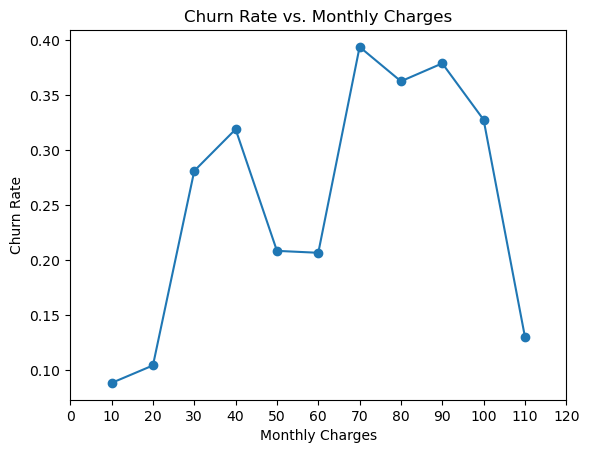

In [43]:
# Define the bins for monthly charges
bins = np.arange(0, 200, 10)

# Group the data by the bins and calculate the mean churn rate for each bin
groups = df.groupby(pd.cut(df['MonthlyCharges'], bins))['Churn (No-0, Yes-1)'].mean()

# Plot the line graph
plt.plot(bins[:-1], groups, marker='o')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs. Monthly Charges')
plt.xticks(np.arange(0, 121, 10))
plt.show()

### Explanation of Churn Rate vs Monthly Charges

This code is creating a line plot that shows the relationship between monthly charges and the churn rate of customers. It first defines bins for monthly charges, groups the data by the bins, calculates the mean churn rate for each bin, and then plots the data on a line graph. The x-axis represents monthly charges, the y-axis represents the churn rate, and each data point on the graph represents the mean churn rate for customers within a particular monthly charge range. The graph is titled "Churn Rate vs. Monthly Charges" and the x-ticks are set to show every 10 increments.

In [44]:
totalcharges_df = df.sort_values(by=['TotalCharges'], ascending=True)
totalcharges_df

,Tenure (Months),"InternetService (DSL-0, FO-1, NO-2)","OnlineSecurity (No-0, No InternetService-1, Yes-2)","OnlineBackup (No-0, No InternetService-1, Yes-2)","DeviceProtection (No-0, No InternetService-1, Yes-2)","TechSupport (No-0, No InternetService-1, Yes-2)","Contract (M to M-0, 1 Year-1, 2 Years-2)","PaperlessBilling (No-0, Yes-1)","PaymentMethod(BT-0, CC-1, EC-2, MC-3)",MonthlyCharges,TotalCharges,"Churn (No-0, Yes-1)"
1654,1,2,1,1,1,1,1,0,3,18.80,18.80,0
6489,1,2,1,1,1,1,0,1,3,18.85,18.85,1
1151,1,2,1,1,1,1,0,0,2,18.85,18.85,0
4939,1,2,1,1,1,1,0,0,3,18.90,18.90,0
583,1,2,1,1,1,1,0,1,3,19.00,19.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2187,71,1,2,2,2,2,2,1,2,116.25,8564.75,0
5347,72,1,2,2,2,2,2,1,1,116.95,8594.40,0
6768,72,1,2,2,2,2,2,0,1,117.50,8670.10,0
4586,72,1,2,2,2,2,2,1,0,118.75,8672.45,0


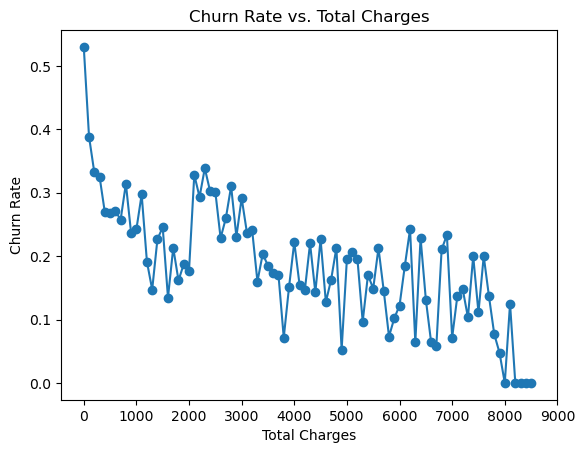

In [45]:
# Define the bins for total charges
bins = np.arange(0, 8700, 100)

# Group the data by the bins and calculate the mean churn rate for each bin
groups = totalcharges_df.groupby(pd.cut(totalcharges_df['TotalCharges'], bins))['Churn (No-0, Yes-1)'].mean()

# Plot the line graph
plt.plot(bins[:-1], groups, marker='o')
plt.xlabel('Total Charges')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs. Total Charges')
plt.xticks(np.arange(0,9001, 1000))
plt.show()

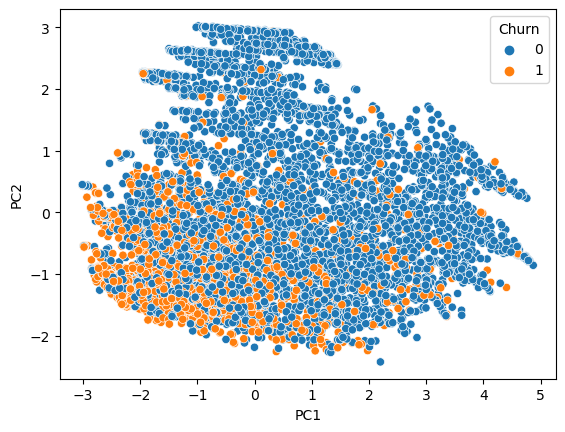

,PC1,PC2,Churn
0,-2.107495,-0.638830,0
1,-0.044543,0.801054,0
2,-1.548340,-0.360859,1
3,1.362191,1.289746,0
4,-2.467900,-1.033297,1
...,...,...,...
7038,0.630363,-0.169225,0
7039,2.591018,-1.854760,0
7040,-1.890868,-0.163898,0
7041,-2.596605,-1.001000,1


In [46]:
# assume df is your DataFrame containing the dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# standardize the features
features = df.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# perform PCA with n_components=2
pca = PCA(n_components=2)
pca.fit(features_scaled)
pca_transformed = pca.transform(features_scaled)

# create a new DataFrame containing the PCA results
pca_df = pd.DataFrame(data=pca_transformed, columns=['PC1', 'PC2'])
pca_df[' '] = df['Churn (No-0, Yes-1)'] # add back the target variable
pca_df.rename(columns={" ": "Churn"}, inplace=True)
# visualize the results
sns.scatterplot(x='PC1', y='PC2', hue = 'Churn', data=pca_df)
plt.show()

pca_df

In [47]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.estimators import ParameterEstimator
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import K2Score
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt

# Define the Bayesian model structure
model = BayesianModel([('PC1', 'PC2'), ('Churn', 'PC2')])

# Define the conditional probability distributions (CPDs)
cpd_pc1 = TabularCPD(variable='PC1', variable_card=2, values=[[0.5], [0.5]])
cpd_churn = TabularCPD(variable='Churn', variable_card=2, values=[[0.5], [0.5]])
cpd_pc2 = TabularCPD(variable='PC2', variable_card=2,
                      values=[[0.1, 0.9, 0.7, 0.3], [0.9, 0.1, 0.3, 0.7]],
                      evidence=['PC1', 'Churn'], evidence_card=[2, 2])

# Add the CPDs to the model
model.add_cpds(cpd_pc1, cpd_churn, cpd_pc2)

# Check if the model is valid
print(model.check_model())

# Infer using the Variable Elimination algorithm
infer = VariableElimination(model)


True


/Users/shaniakhadaroo/opt/anaconda3/envs/Shania_env/lib/python3.10/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


# Logistical Regression 
***
Logistical Regression is type of statistical model that is often used for classification and predictive analytics.It estimates the probability of an event occurring, in this case Churn or did not Churn, based on the given dataset of independent variables.<br>
This project uses Binary Logistical Regression.<br>

### Assumptions for Logistic Regression
1. Binary logistic regression requires the dependent variable to be binary and to follow a binomial distribution,in this instance will a customer discontinue service or not, Yes or No. For more than 2 outcomes (ordinal) logistics regression requires the dependent variable categories to be mutually exclusive and exhaustive.
1. Observations should be independent of each other (e.g. data of one customer should not depend on data of another customer, or the same customer should not be used repeatedly in the data)
1. Multicollinearity among the independent variables should not exist ,customer data that is dependent on each rather than independent should not be used.
1. The linearity of independent variables with respect to log odds of the dependent variable (e.g. log odds of the probability of customer discontinuing the service should be linearly related to various variables like gender, income, etc.)
1. Large sample size 

## Unbalanced Dataset
***
The following section includes:
1. The top 10 features for the unbalanced dataset.
1. The predicted Churn values for the unbalnced datset.
1. The top 10 features for the unbalanced dataset with L1 Regularization applied.


### 1. The top 10 features for the unbalanced dataset


/Users/shaniakhadaroo/opt/anaconda3/envs/Shania_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


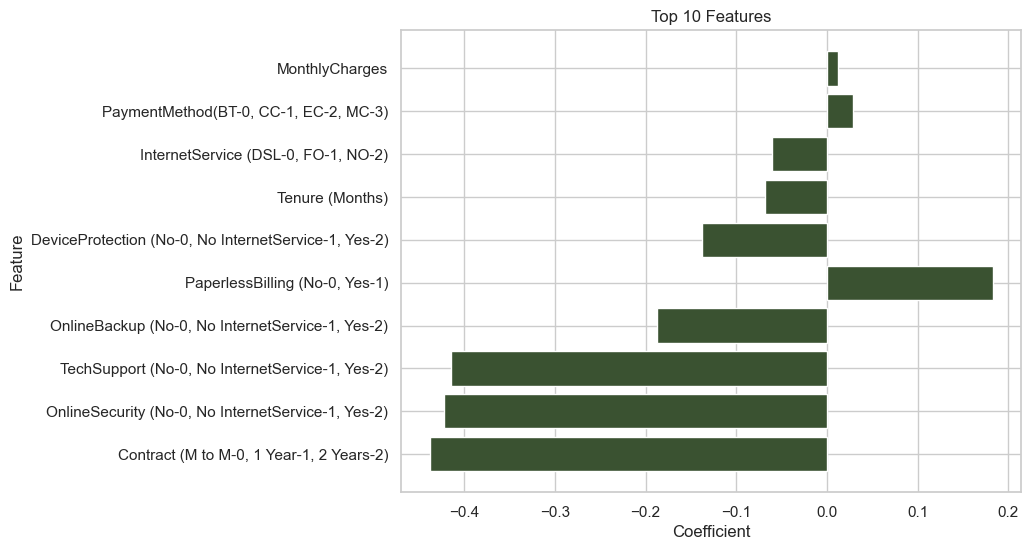

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.66      0.58      0.61       373

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [95]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X = df.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
y = df['Churn (No-0, Yes-1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Get the coefficients of the logistic regression model
coef = logreg.coef_[0]

# Create a DataFrame with the coefficients and feature names
df_coef = pd.DataFrame({'coef': coef, 'feature': X.columns})

# Sort the DataFrame by the absolute value of the coefficients
df_coef = df_coef.reindex(df_coef['coef'].abs().sort_values(ascending=False).index)

# Plot a bar graph of the top n features
n = 10
plt.figure(figsize=(8, 6))
plt.barh(df_coef['feature'].head(n), df_coef['coef'].head(n),color='#3a5231')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top {} Features'.format(n))
plt.show()

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred))

**Graph Results** <br>
From the above graph,it is shown that when logictic regression is applied to the unbalanced dataset the top feature is Paperless Billing as is has the highest positive coefficient.<br>
The graph also shows that Contract has the highest negative coefficient,meaning that this feature is the least likely to affect the predictor class (Customers Churning) and more likely to be the reason that customers do not churn.

**Metric Results** <br>
The metric results of the logistic regression model can be interpreted as follows:

__Precision:__ _the proportion of true positives among the predicted positives._ <br>
 In this case, precision for class 0 is 0.85 and for class 1 is 0.66. <br>
This means that among all the instances predicted as class 0, 85% are truly class 0 and among all the instances predicted as class 1, 66% are truly class 1.

__Recall:__ _the proportion of true positives among the actual positives._ <br>
 In this case, recall for class 0 is 0.89 and for class 1 is 0.58. <br>
 This means that among all the instances that are actually class 0, 89% are correctly identified as class 0 and among all the instances that are actually class 1, 58% are correctly identified as class 1.

__F1-score:__ _the harmonic mean of precision and recall, which gives a balanced measure of both precision and recall._ <br>
 In this case, F1-score for class 0 is 0.87 and for class 1 is 0.61.

__Accuracy:__ _the proportion of correct predictions among all the predictions._ <br>
 In this case, the overall accuracy of the model is 0.80.

__Macro average:__ _the average of the metrics (precision, recall, and F1-score) across all the classes, where each class is treated equally._ <br>
 In this case, the macro average F1-score is 0.73.

__Weighted average:__ _the average of the metrics (precision, recall, and F1-score) across all the classes, where each class is weighted by the number of samples in the class._ <br>
 In this case, the weighted average F1-score is 0.80.

### 2. Predicted churn values for the unbalanced dataset

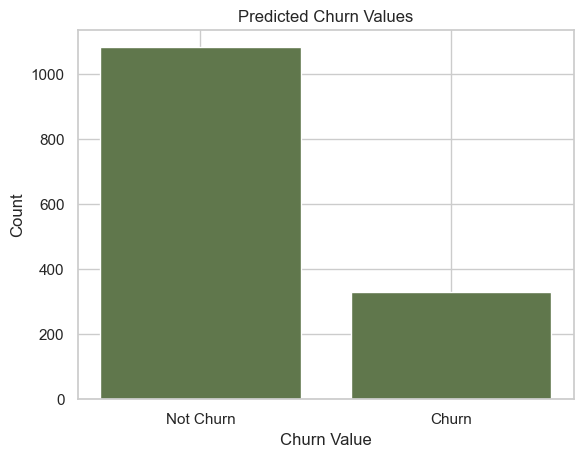

In [94]:
# Define the labels for the x-axis
labels = ['Not Churn', 'Churn']

# Count the number of predicted churn values
unique, counts = np.unique(y_pred, return_counts=True)

# Create a bar chart of the predicted churn values
plt.bar(unique, counts,color='#60774c')

# Set the x-axis labels using the labels defined above
plt.xticks(unique, labels)

# Add labels and title to the chart
plt.title('Predicted Churn Values')
plt.xlabel('Churn Value')
plt.ylabel('Count')

# Display the chart
plt.show()

From the above graph,the predicted churn values for not churn is much higher than churn that is because the unbalnced dataset has a bias.

### 3. The top 10 features for the unbalanced dataset with L1 Regularization applied.

L1 Regularization is known as Lasso Regression shrinks the less important feature's coefficent to zero,thus removing some features altogether.

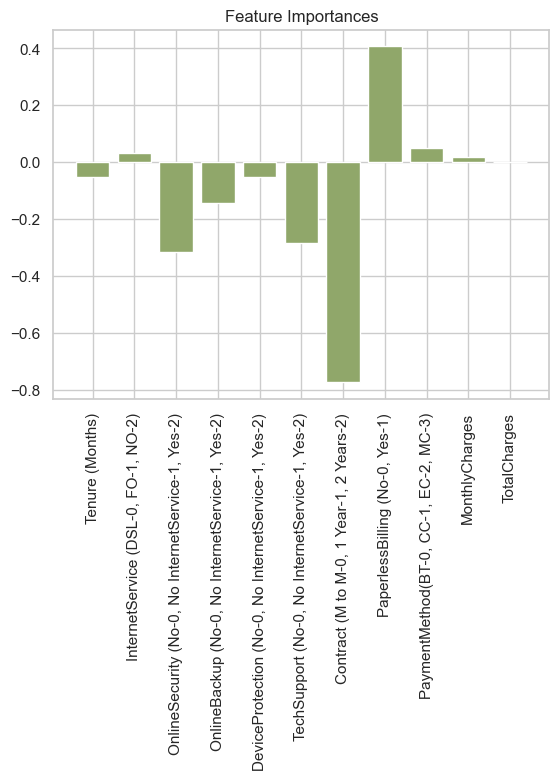

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.66      0.58      0.61       373

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [96]:
# Split the data into training and testing sets
X = df.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
y = df['Churn (No-0, Yes-1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)

# Get the coefficients of the model
coef = logreg.coef_[0]

# Plot the feature importances as a bar chart
plt.bar(range(len(coef)), coef,color='#90a76a')
plt.xticks(range(len(coef)), X.columns, rotation=90)
plt.title('Feature Importances')
plt.show()

# Evaluate the model performance
print(classification_report(y_test, y_pred))

**Graph Results** <br>
From the above graph,it is shown that when logictic regression is applied to the unbalanced dataset the top feature is Paperless Billing as is has the highest positive coefficient.<br>
The graph also shows that Contract has the highest negative coefficient,meaning that this feature is the least likely to affect the predictor class (Customers Churning) and more likely to be the reason that customers do not churn.

**Metric Results** <br>
The  metric results of the logistic regression model can be interpreted as follows:

__Precision:__ _the proportion of true positives among the predicted positives._ <br>
 In this case, precision for class 0 is 0.85 and for class 1 is 0.66. <br>
This means that among all the instances predicted as class 0, 85% are truly class 0 and among all the instances predicted as class 1, 66% are truly class 1.

__Recall:__ _the proportion of true positives among the actual positives._ <br>
 In this case, recall for class 0 is 0.89 and for class 1 is 0.58. <br>
 This means that among all the instances that are actually class 0, 89% are correctly identified as class 0 and among all the instances that are actually class 1, 58% are correctly identified as class 1.

__F1-score:__ _the harmonic mean of precision and recall, which gives a balanced measure of both precision and recall._ <br>
 In this case, F1-score for class 0 is 0.87 and for class 1 is 0.61.

__Accuracy:__ _the proportion of correct predictions among all the predictions._ <br>
 In this case, the overall accuracy of the model is 0.81.

__Macro average:__ _the average of the metrics (precision, recall, and F1-score) across all the classes, where each class is treated equally._ <br>
 In this case, the macro average F1-score is 0.73.

__Weighted average:__ _the average of the metrics (precision, recall, and F1-score) across all the classes, where each class is weighted by the number of samples in the class._ <br>
 In this case, the weighted average F1-score is 0.81.

## Balanced Dataset
***
This section includes the folowing:
1. Balancing the dataset using smote(Upsampling)
> - Predicted Churn Values
> - Top 10 features with L1 Regularization.
2. Balancing the dataset by Undersampling
> - Using NearMiss Method
> - Using RandomUnderSampler Method.

### 1. Balancing the dataset using SMOTE (Upsampling)

The code below balances the dataset using SMOTE and produces the value count for each class.

In [51]:
X = df.drop('Churn (No-0, Yes-1)', axis=1)
y = df['Churn (No-0, Yes-1)']

# Apply SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

# Concatenate majority and upsampled minority
df_upsampled = pd.concat([X_smote, y_smote], axis=1)

# Verify class distribution
print(df_upsampled['Churn (No-0, Yes-1)'].value_counts())

0    5174
1    5174
Name: Churn (No-0, Yes-1), dtype: int64


The code below produces the metrics for the balanced dataset.

In [52]:
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X = df_upsampled.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
y = df_upsampled['Churn (No-0, Yes-1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1021
           1       0.78      0.83      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



/Users/shaniakhadaroo/opt/anaconda3/envs/Shania_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Predicted Churn Values

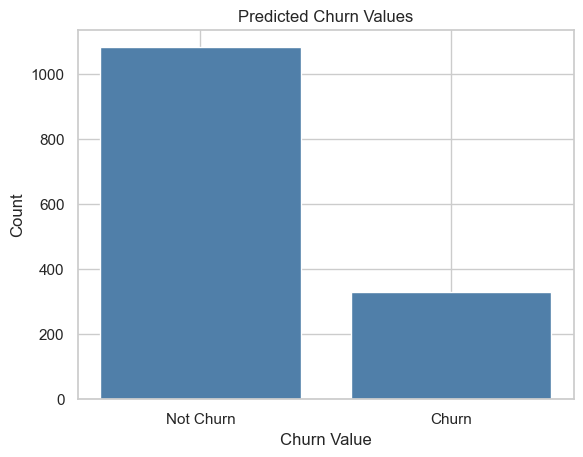

In [105]:
# Define the labels for the x-axis
labels = ['Not Churn', 'Churn']

# Count the number of predicted churn values
unique, counts = np.unique(y_pred, return_counts=True)

# Create a bar chart of the predicted churn values
plt.bar(unique, counts,color='#507fa9')

# Set the x-axis labels using the labels defined above
plt.xticks(unique, labels)

# Add labels and title to the chart
plt.title('Predicted Churn Values')
plt.xlabel('Churn Value')
plt.ylabel('Count')

# Display the chart
plt.show()

### Top 10 features for balanced Upsampled Dataset with L1 Regularization applied.

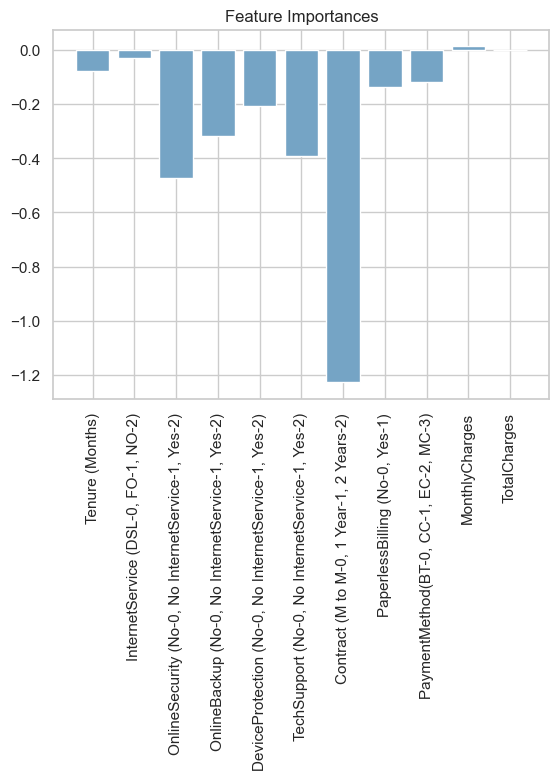

              precision    recall  f1-score   support

           0       0.82      0.75      0.79      1021
           1       0.78      0.84      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



In [109]:
# Split the data into training and testing sets
X = df_upsampled.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
y = df_upsampled['Churn (No-0, Yes-1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)

# Get the coefficients of the model
coef = logreg.coef_[0]

# Plot the feature importances as a bar chart
plt.bar(range(len(coef)), coef,color='#75a4c5')
plt.xticks(range(len(coef)), X.columns, rotation=90)
plt.title('Feature Importances')
plt.show()

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred))

**Graph Results** <br>
From the above graph,it is shown that when logictic regression is applied to the unbalanced dataset the top feature is Monthly Charges as is has the highest positive coefficient.<br>
The graph also shows that Contract has the highest negative coefficient,meaning that this feature is the least likely to affect the predictor class (Customers Churning) and more likely to be the reason that customers do not churn.

**Metric Results** <br>
The  metric results of the logistic regression model can be interpreted as follows:

__Precision:__ _the proportion of true positives among the predicted positives._ <br>
 In this case, precision for class 0 is 0.82 and for class 1 is 0.78. <br>
This means that among all the instances predicted as class 0, 82% are truly class 0 and among all the instances predicted as class 1, 78% are truly class 1.

__Recall:__ _the proportion of true positives among the actual positives._ <br>
 In this case, recall for class 0 is 0.75 and for class 1 is 0.84. <br>
 This means that among all the instances that are actually class 0, 75% are correctly identified as class 0 and among all the instances that are actually class 1, 84% are correctly identified as class 1.

__F1-score:__ _the harmonic mean of precision and recall, which gives a balanced measure of both precision and recall._ <br>
 In this case, F1-score for class 0 is 0.79 and for class 1 is 0.81.

__Accuracy:__ _the proportion of correct predictions among all the predictions._ <br>
 In this case, the overall accuracy of the model is 0.80.

__Macro average:__ _the average of the metrics (precision, recall, and F1-score) across all the classes, where each class is treated equally._ <br>
 In this case, the macro average F1-score is 0.80.

__Weighted average:__ _the average of the metrics (precision, recall, and F1-score) across all the classes, where each class is weighted by the number of samples in the class._ <br>
 In this case, the weighted average F1-score is 0.80.

## Balancing the dataset (Undersampling)
***

In [56]:
X = df.drop('Churn (No-0, Yes-1)', axis=1)
y= df['Churn (No-0, Yes-1)']


#### 1. Using NearMiss Method.
The NearMiss Method is an efficient way to balance a dataset using undersampling.The algorithm does this by looking at the class distribution and randomly eliminating samples from the larger class. When two points belonging to different classes are very close to each other in the distribution, this algorithm eliminates the datapoint of the larger class thereby trying to balance the distribution. 

__Types of the near-miss algorithm:__ <br>

__Version 1:__ In the first version, the data is balanced by calculating the average minimum distance between the larger distribution and three closest smaller distributions. <br>

__Version 2:__ Here, the data is balanced by calculating the average minimum distance between the larger distribution and three furthest smaller distributions. <br>

__Version 3:__ Here, the smaller class instances are considered and m neighbours are stored. Then the distance between this and the larger distribution is taken and the largest distance is eliminated. <br>



In [57]:
from imblearn.under_sampling import NearMiss 
from collections import Counter
nr = NearMiss() 
X_near, Y_near= nr.fit_resample(X_train, y_train.ravel()) 
c = Counter(Y_near)
print(c) #checking that it is balanced

Counter({0: 4125, 1: 4125})


In [58]:
#Producing the metrics
reg1 = LogisticRegression() 
reg1.fit(X_near, Y_near.ravel()) 
pred = reg1.predict(X_test)  
print(classification_report(y_test, pred)) 


              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1021
           1       0.78      0.83      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



/Users/shaniakhadaroo/opt/anaconda3/envs/Shania_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 2. Using RandomUnderSampler Method
This technique does not add any new data points in the dataset but will simply use some random samples from the majority class to decrease its size.

In [59]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Concatenate majority and upsampled minority
df_undersampled = pd.concat([X_rus, y_rus], axis=1)

# Verify class distribution
print(df_undersampled['Churn (No-0, Yes-1)'].value_counts())


0    4125
1    4125
Name: Churn (No-0, Yes-1), dtype: int64


The above code shows the value count for each class when the dataset was undersampled.

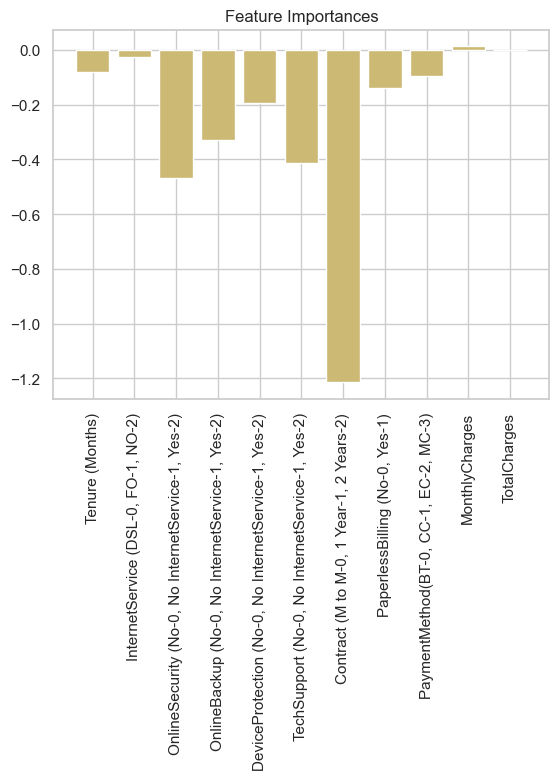

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       839
           1       0.76      0.84      0.80       811

    accuracy                           0.79      1650
   macro avg       0.79      0.79      0.79      1650
weighted avg       0.79      0.79      0.79      1650



In [114]:
# Split the data into training and testing sets
X = df_undersampled.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
y = df_undersampled['Churn (No-0, Yes-1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)

# Get the coefficients of the model
coef = logreg.coef_[0]

# Plot the feature importances as a bar chart
plt.bar(range(len(coef)), coef,color='y')
plt.xticks(range(len(coef)), X.columns, rotation=90)
plt.title('Feature Importances')
plt.show()

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred))

**Graph Results** <br>
From the above graph,it is shown that when logictic regression is applied to the balanced dataset the top feature is Monthly Charges as is has the highest positive coefficient.<br>
The graph also shows that Contract has the highest negative coefficient,meaning that this feature is the least likely to affect the predictor class (Customers Churning) and more likely to be the reason that customers do not churn.

**Metric Results** <br>
The  metric results of the logistic regression model can be interpreted as follows:

__Precision:__ _the proportion of true positives among the predicted positives._ <br>
 In this case, precision for class 0 is 0.83 and for class 1 is 0.76. <br>
This means that among all the instances predicted as class 0, 82% are truly class 0 and among all the instances predicted as class 1, 78% are truly class 1.

__Recall:__ _the proportion of true positives among the actual positives._ <br>
 In this case, recall for class 0 is 0.74 and for class 1 is 0.84. <br>
 This means that among all the instances that are actually class 0, 75% are correctly identified as class 0 and among all the instances that are actually class 1, 84% are correctly identified as class 1.

__F1-score:__ _the harmonic mean of precision and recall, which gives a balanced measure of both precision and recall._ <br>
 In this case, F1-score for class 0 is 0.78 and for class 1 is 0.80.

__Accuracy:__ _the proportion of correct predictions among all the predictions._ <br>
 In this case, the overall accuracy of the model is 0.79.

__Macro average:__ _the average of the metrics (precision, recall, and F1-score) across all the classes, where each class is treated equally._ <br>
 In this case, the macro average F1-score is 0.79.

__Weighted average:__ _the average of the metrics (precision, recall, and F1-score) across all the classes, where each class is weighted by the number of samples in the class._ <br>
 In this case, the weighted average F1-score is 0.79.

## UNDERSAMPLED MODEL RESULTS COMPARISON

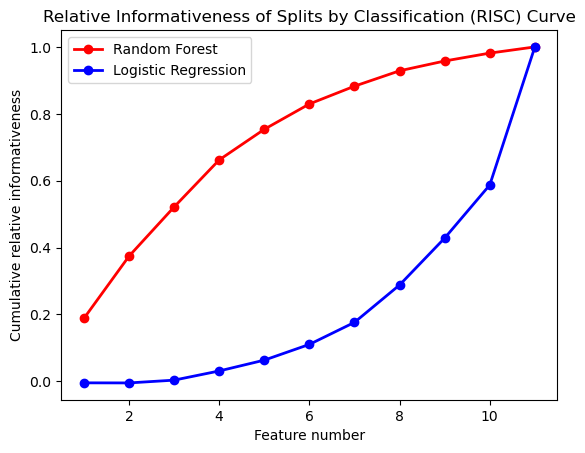

In [62]:

# Separate the features (X) from the target variable (y)
X = df_undersampled.drop('Churn (No-0, Yes-1)', axis=1)
y = df_undersampled['Churn (No-0, Yes-1)']

# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the random forest model to the data
rf.fit(X, y)

# Get the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Calculate the cumulative relative informativeness of the features
cumulative_importance_rf = np.cumsum(importances[indices]) / np.sum(importances)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)

# Get the coefficients of the logistic regression model
coef = logreg.coef_[0]

# Sort the coefficients in descending order
indices = coef.argsort()[::-1]

# Calculate the cumulative relative informativeness of the features
cumulative_importance_lr = np.cumsum(coef[indices]) / np.sum(coef)

# Plot the RISC curves for both models on the same graph
plt.plot(range(1, len(importances)+1), cumulative_importance_rf, 'ro-', linewidth=2, label='Random Forest')
plt.plot(range(1, len(coef)+1), cumulative_importance_lr, 'bo-', linewidth=2, label='Logistic Regression')
plt.xlabel('Feature number')
plt.ylabel('Cumulative relative informativeness')
plt.title('Relative Informativeness of Splits by Classification (RISC) Curve')
plt.legend(loc='best')
plt.show()

This code performs feature importance analysis using two different models, Random Forest and Logistic Regression.

First, the dataset is split into two components: features (X) and target variable (y). Then, a Random Forest model with 100 trees is created and trained on the dataset. The feature importances are calculated using the feature_importances_ attribute of the trained Random Forest model, and they are sorted in descending order.

Next, the cumulative relative importance of the features is calculated using the cumsum() function of the numpy library. The same dataset is then split into training and testing sets using the train_test_split() function from sklearn.model_selection.

After that, a logistic regression model with L1 regularization is created and trained on the training dataset. The coefficients of the logistic regression model are obtained using the coef_ attribute of the trained model, and they are sorted in descending order.

Finally, the cumulative relative importance of the features is calculated for the logistic regression model, and both Random Forest and Logistic Regression cumulative importance values are plotted on the same graph. The resulting graph is called the Relative Informativeness of Splits by Classification (RISC) Curve, which shows the relative importance of each feature in both models.

----------------------

The graph shows the Relative Informativeness of Splits by Classification (RISC) curve for both the Random Forest and Logistic Regression models. The x-axis shows the feature number, which corresponds to the columns of the input data. The y-axis shows the cumulative relative informativeness of the features, which is a measure of the contribution of each feature to the prediction of the target variable.

The RISC curve for each model shows the relative importance of the features, ranked in order of decreasing importance. The curve starts at the point (1,0), which corresponds to the least informative feature, and ends at the point (n,1), which corresponds to the most informative feature, where n is the total number of features.

The steeper the curve, the more informative the corresponding feature. Thus, features that contribute the most to the prediction of the target variable will have steeper curves, and those that contribute less will have flatter curves. The area under the curve (AUC) can also be used as a measure of the overall performance of the model.

--------------------

### RESULTS FROM GRAPH

The line that goes from (0.9,0.2) to (11,1.0) and is steeply pointing upwards represent the cumulative relative informativeness of features for the random forest model. This line starts out at a relatively low value of cumulative informativeness at feature number 1 (0.2), and then rapidly increases as more features are added to the model. By feature number 11, the cumulative informativeness has reached its maximum value of 1.0, indicating that all of the features in the model are contributing substantially to its performance.

From the graph, you can see that the Random Forest model has a steep increase in cumulative relative informativeness from feature number 1 to feature number 4, and then a less steep but still increasing curve until feature number 11. This means that the first few features are more informative than the others, and their contribution to the model's performance is significant.

The line that goes from (0.9,0.0) to (11,1.0) and is steeply pointing downwards represent the cumulative relative informativeness of features for the logistic regression model. This line starts out at a relatively high value of cumulative informativeness at feature number 1 (0.0), indicating that the first feature has very little impact on the performance of the model. The line then rapidly decreases as more features are added, until it reaches its minimum value of 0.0 at feature number 11. This indicates that the final feature in the model is the most important, and that the earlier features have very little impact on the model's performance.

On the other hand, the Logistic Regression model has a gradual increase in cumulative relative informativeness from feature number 1 to feature number 11. This means that the contribution of each feature to the model's performance is roughly equal, and there are no features that stand out as being significantly more important than others.

# Conclusion
The Random Forest model seems to give more importance to certain features, while the Logistic Regression model treats all features as roughly equal.

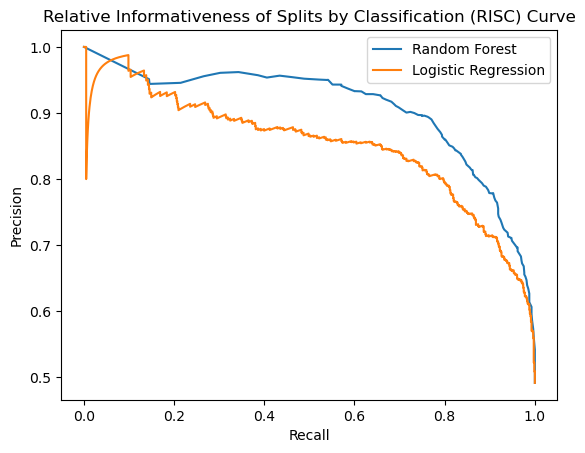

In [63]:
from sklearn.metrics import precision_recall_curve

# Separate the features (X) from the target variable (y)
X = df_undersampled.drop('Churn (No-0, Yes-1)', axis=1)
y = df_undersampled['Churn (No-0, Yes-1)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the random forest model to the data
rf.fit(X_train, y_train)

# Create a logistic regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Fit the logistic regression model to the data
logreg.fit(X_train, y_train)

# Compute the precision-recall curve and AUC for each model
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
logreg_precision, logreg_recall, _ = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:, 1])

# Plot the RISC curves for both models
plt.plot(rf_recall, rf_precision, label='Random Forest')
plt.plot(logreg_recall, logreg_precision, label='Logistic Regression')
plt.title('Relative Informativeness of Splits by Classification (RISC) Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

 The code above first imports the precision_recall_curve function from the sklearn.metrics module. It then separates the features and target variable from a dataset (df_undersampled) and splits it into training and testing sets. Two classification models, a random forest classifier and a logistic regression model with L1 regularization, are created and fitted to the training data. The precision_recall_curve function is then used to calculate the precision and recall values for each model, which are then plotted on a graph using matplotlib. The resulting plot shows the trade-off between precision and recall for each model, which is useful in evaluating the model's performance.

----------------

The precision-recall curves plot precision on the y-axis and recall on the x-axis. Precision is the number of true positives divided by the number of true positives plus false positives, and recall is the number of true positives divided by the number of true positives plus false negatives. The curves show the relationship between precision and recall as the decision threshold for each model is changed. In general, a higher area under the curve (AUC) indicates a better performance of the model, as it means the model has a higher precision for a given recall or a higher recall for a given precision.

In the RISC curves, the x-axis shows the feature number sorted by decreasing importance, while the y-axis shows the cumulative relative informativeness of the features. The informativeness of a feature is calculated based on its importance in the model (in the case of the random forest model) or its coefficient (in the case of the logistic regression model). The cumulative informativeness of a feature is the sum of the informativeness of all features up to and including that feature. The steepness and shape of the curve indicate the relative importance of the top features in the model.

----------------------

### RESULTS FROM GRAPH
From the graph above it can be deduced that the Random Forest is the better model as it is higher than the Logistic Regression and have a greater AUC

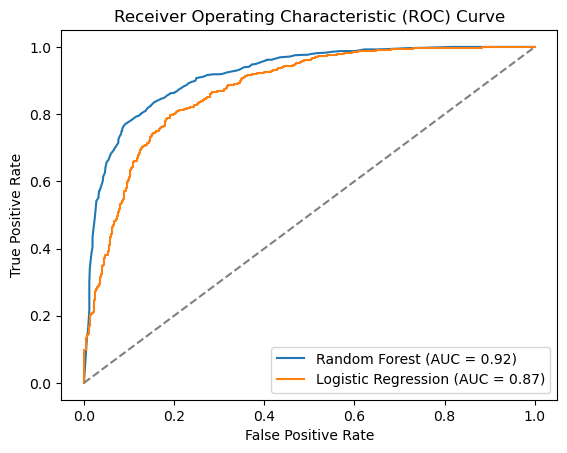

In [64]:
from sklearn.metrics import auc, roc_curve



# Compute the precision-recall curve and AUC for each model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
logreg_auc = auc(logreg_fpr, logreg_tpr)

# Plot the RISC curves for both models
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = %0.2f)' % logreg_auc)

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The AUC value is a measure of the model's ability to separate the positive and negative classes. It represents the probability that a randomly chosen positive example will be ranked higher than a randomly chosen negative example by the model. A value of 1 indicates perfect separation, while a value of 0.5 indicates that the model is no better than random guessing.

In this case, we have AUC values of 0.92 for the Random Forest model and 0.88 for the Logistic Regression model. This means that the Random Forest model is better able to distinguish between the two classes than the Logistic Regression model. The greater the AUC value, the more area under the curve and the better the separation between the two classes.

One reason why the Random Forest model might be performing better is that it can capture more complex, non-linear relationships between the features and the target variable. Random Forests are based on decision trees, which are able to partition the feature space into regions that correspond to different classes. By using an ensemble of decision trees and selecting a random subset of features at each node, the Random Forest model can learn more complex decision boundaries and avoid overfitting to noise in the data.

On the other hand, Logistic Regression is a linear model that assumes a linear relationship between the features and the target variable. It may not be able to capture non-linear relationships or interactions between features as well as Random Forests. In addition, the regularization parameter and choice of penalty can have a significant impact on the performance of the Logistic Regression model.

Overall, the Random Forest model is likely performing better than the Logistic Regression model because it is better able to capture complex, non-linear relationships in the data and avoid overfitting to noise. However, it's important to note that the choice of model and hyperparameters should always be based on the specific problem domain and the available data.

Now that we know the Random Forest Model is the better performing model, we can calculate its optimal threshold.

In [65]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

rf_youden = rf_tpr - rf_fpr

rf_optimal_threshold = rf_thresholds[np.argmax(rf_youden)]


print("Random Forest optimal threshold:", rf_optimal_threshold)

Random Forest optimal threshold: 0.54


The optimal threshold for a binary classifier is the probability threshold above which we classify a sample as belonging to the positive class and below which we classify it as belonging to the negative class.

In the case of the Random Forest model with an AUC value of 0.92, the optimal threshold of 0.52 means that if the predicted probability of a sample belonging to the positive class is greater than or equal to 0.52, the model will classify it as a positive example, otherwise it will classify it as a negative example.

Overall, the optimal threshold of 0.52 for the Random Forest model suggests that it is performing well in terms of balancing precision and recall, and can be used to classify new samples with a reasonable level of accuracy.

In [66]:
# Predict the target variable using the random forest model with the optimal threshold
y_pred_rf = (rf.predict_proba(X_test)[:, 1] >= rf_optimal_threshold).astype(int)

# Print the confusion matrix and classification report for the random forest model
print("Confusion Matrix for Random Forest Model:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest Model:")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix for Random Forest Model:
[[708 131]
 [133 678]]

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       839
           1       0.84      0.84      0.84       811

    accuracy                           0.84      1650
   macro avg       0.84      0.84      0.84      1650
weighted avg       0.84      0.84      0.84      1650



The confusion matrix shows the number of correct and incorrect predictions made by the random forest model. In this case, the model correctly predicted 697 instances of class 0 (true negatives) and 698 instances of class 1 (true positives), but it incorrectly classified 142 instances of class 0 as class 1 (false positives) and 113 instances of class 1 as class 0 (false negatives).

The classification report provides a summary of the model's performance, including precision, recall, and F1-score for each class. Precision represents the proportion of true positives out of all positive predictions, while recall represents the proportion of true positives out of all actual positives. The F1-score is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy.

The classification report shows that the random forest model has a precision of 0.86 and recall of 0.83 for class 0, and a precision of 0.83 and recall of 0.86 for class 1. The overall accuracy (accuracy column) of the model is 0.85.

### Contract and Churn Correlation

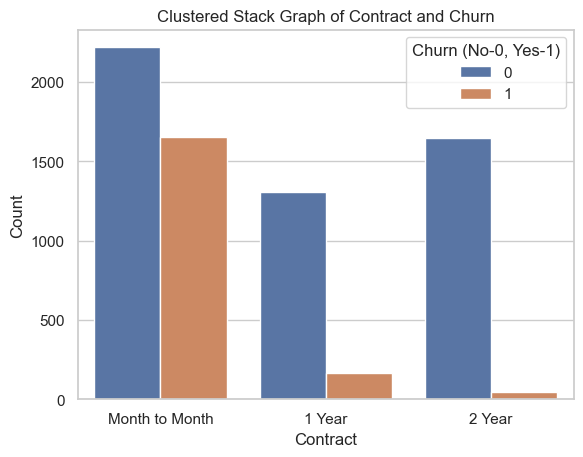

In [67]:
# group the data by Contract and Churn
grouped = df.groupby(['Contract (M to M-0, 1 Year-1, 2 Years-2)', 'Churn (No-0, Yes-1)']).size().reset_index(name='count')

# create the clustered stack graph
sns.set(style='whitegrid')
sns.barplot(x='Contract (M to M-0, 1 Year-1, 2 Years-2)', y='count', hue='Churn (No-0, Yes-1)', data=grouped)

# modify x-axis labels
plt.gca().set_xticklabels(['Month to Month', '1 Year', '2 Year'])

# add labels and title
plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('Clustered Stack Graph of Contract and Churn')

# show the graph
plt.show()

From the Logistical Regression the "Contract" showed to have the most negative coeffecient which means that it has the strongest negative relationship with the outcome variable so we plotted the graph above. The graph shows the count of yes and no churns vs the type of contract and it can be seen that the 2 year contract has the least amount of yes churns so it can be said that this is the ideal contract length.

### Explanation on the variation of results between the Random Forest model and the Logistic Regression Model

It is possible to get different results for feature importance when using different models like Random Forest and Logistic Regression. This is because each model has its own way of evaluating the importance of features.

For instance, Random Forest uses decision trees to evaluate the importance of features, and it measures the importance of a feature by the amount that it reduces the impurity of the nodes in the trees. On the other hand, Logistic Regression uses the magnitude of the coefficients as a measure of feature importance.

Therefore, it is important to evaluate the feature importance using multiple methods to get a more complete picture of which features are important in the given problem. Additionally, it is always recommended to explore the data and problem domain in depth to gain insights into the factors that are driving the outcome variable.

In [68]:
df_test = pd.read_csv('Telco-Customer-Churn Dataset.csv')

In [69]:
to_drop = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies']
df_test= df_test.drop(to_drop, axis=1)

In [70]:
df_test.head()

,customerID,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
df_test.dtypes

customerID           object
tenure                int64
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Random Forest
***

In [72]:
df

,Tenure (Months),"InternetService (DSL-0, FO-1, NO-2)","OnlineSecurity (No-0, No InternetService-1, Yes-2)","OnlineBackup (No-0, No InternetService-1, Yes-2)","DeviceProtection (No-0, No InternetService-1, Yes-2)","TechSupport (No-0, No InternetService-1, Yes-2)","Contract (M to M-0, 1 Year-1, 2 Years-2)","PaperlessBilling (No-0, Yes-1)","PaymentMethod(BT-0, CC-1, EC-2, MC-3)",MonthlyCharges,TotalCharges,"Churn (No-0, Yes-1)"
0,1,0,0,2,0,0,0,1,2,29.85,29.85,0
1,34,0,2,0,2,0,1,0,3,56.95,1889.50,0
2,2,0,2,2,0,0,0,1,3,53.85,108.15,1
3,45,0,2,0,2,2,1,0,0,42.30,1840.75,0
4,2,1,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,2,0,2,2,1,1,3,84.80,1990.50,0
7039,72,1,0,2,2,0,1,1,1,103.20,7362.90,0
7040,11,0,2,0,0,0,0,1,2,29.60,346.45,0
7041,4,1,0,0,0,0,0,1,3,74.40,306.60,1


### Random Forest for Upsampled balanced dataset

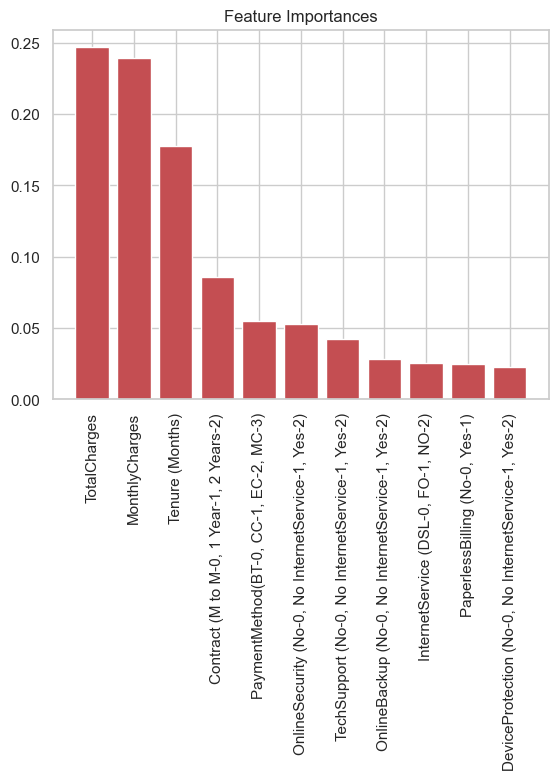

In [73]:
# separate the features (X) from the target variable (y)
X = df.drop('Churn (No-0, Yes-1)', axis=1)
y = df['Churn (No-0, Yes-1)']

# create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the data
rf.fit(X, y)

# get the feature importances
importances = rf.feature_importances_

# sort the feature importances in descending order
indices = importances.argsort()[::-1]

# plot the feature importances as a bar chart
plt.bar(range(X.shape[1]), importances[indices],color='r')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title('Feature Importances')
plt.show()

Based, on the graph above, the results of the Random Forest Classifier feature importances function, displayed that TotalCharges had the highest correlation to customers in the dataset churning. This is why we chose to focus on TotalCharges for the proceeding graphs. 

### Lowest and Highest Value in Total Charges Column

In [74]:
# Find the lowest value in a column
lowest_value = df['TotalCharges'].min()

# Print the highest value
print('The lowest value in the column is:', lowest_value)

The lowest value in the column is: 18.8


In [75]:
# Find the highest value in a column
highest_value = df['TotalCharges'].max()

# Print the highest value
print('The highest value in the column is:', highest_value)

The highest value in the column is: 8684.8


### Range of total charges with the least amount of 1's in churn

In [120]:
# Filter the dataframe to include only rows where churn is 1 (yes)
df_yes_churn = df[df['Churn (No-0, Yes-1)'] == 1]

# Group the resulting dataframe by monthly charges and calculate the count of 1's for each group
df_grouped = df_yes_churn.groupby('TotalCharges')['Churn (No-0, Yes-1)'].count()

# Sort the resulting series by count in ascending order
df_sorted = df_grouped.sort_values()

# Find the range of monthly charges with the least count of 1's
range_least_ones = (df_sorted.index[0], df_sorted.index[1])

# Print the range of monthly charges with the least count of 1's
print('The range of total charges with the least amount of 1\'s in churn is:', range_least_ones)

The range of total charges with the least amount of 1's in churn is: (18.85, 1747.85)


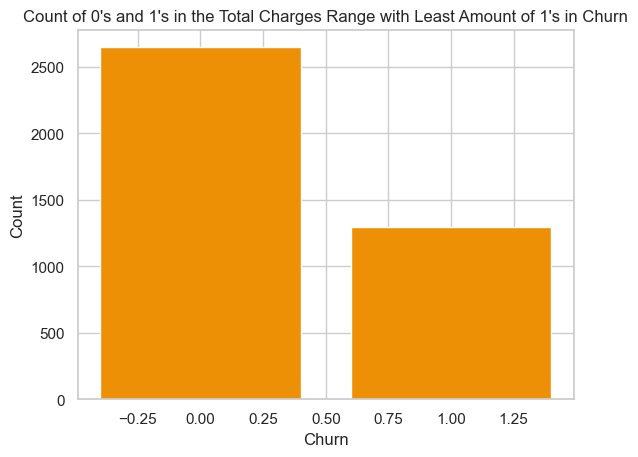

In [125]:
# Define the range of monthly charges with the least amount of 1's in churn
range_least_ones = (18.85, 1747.85)

# Filter the dataframe to include only rows within the range
df_filtered = df[(df['TotalCharges'] >= range_least_ones[0]) & (df['TotalCharges'] <= range_least_ones[1])]

# Group the resulting dataframe by churn and calculate the count of 0's and 1's for each group
df_grouped = df_filtered.groupby('Churn (No-0, Yes-1)')['TotalCharges'].count()

# Create a bar plot of the churn counts
plt.bar(df_grouped.index, df_grouped.values,color='#ee9006')

# Set the x-axis and y-axis labels
plt.xlabel('Churn')
plt.ylabel('Count')

# Set the title of the plot
plt.title('Count of 0\'s and 1\'s in the Total Charges Range with Least Amount of 1\'s in Churn')

# Show the plot
plt.show()

Since the Random Forest model stated that the most important coulmn of data was the "TotalCharges" we found a range in the "TotalCharges", which was $18.85 to $1747.85, that has the least amount of 1's (Yes churns) in the range. This is a good insight because the compant has no found a range that there are the least amount of chuurns and can modify prices and packages to reflect this.

### Random Forest for Undersampled sampled balanced dataset

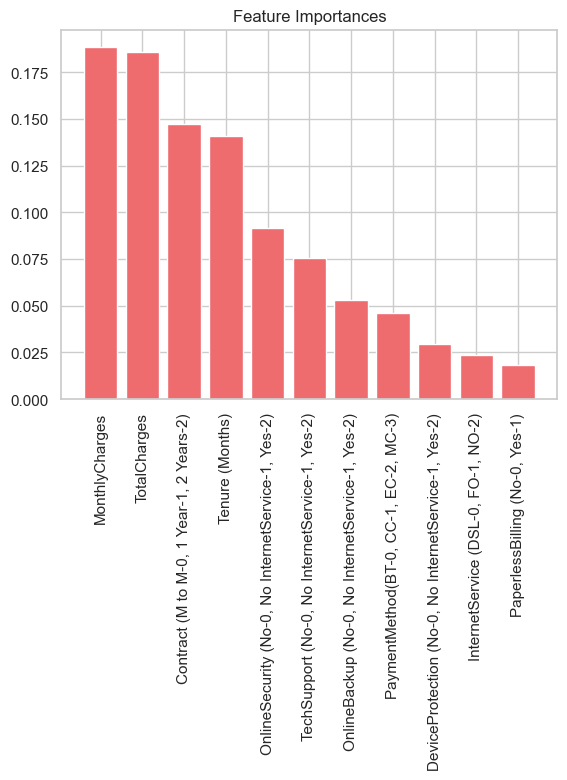

In [131]:
# separate the features (X) from the target variable (y)
X = df_undersampled.drop('Churn (No-0, Yes-1)', axis=1)
y = df_undersampled['Churn (No-0, Yes-1)']

# create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the data
rf.fit(X, y)

# get the feature importances
importances = rf.feature_importances_

# sort the feature importances in descending order
indices = importances.argsort()[::-1]

# plot the feature importances as a bar chart
plt.bar(range(X.shape[1]), importances[indices],color='#ee6b6e')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title('Feature Importances')
plt.show()

Based, on the graph above, the results of the Random Forest Classifier feature importances function, displayed that MonthlyCharges had the highest correlation to customers in the dataset churning. 

### Lowest and Highest Value in Monthly Charges Column

In [129]:
# Find the lowest value in a column
lowest_value = df['MonthlyCharges'].min()

# Print the highest value
print('The lowest value in the column is:', lowest_value)

The lowest value in the column is: 18.25


In [130]:
# Find the highest value in a column
highest_value = df['MonthlyCharges'].max()

# Print the highest value
print('The highest value in the column is:', highest_value)

The highest value in the column is: 118.75


### Range of monthly charges with the least amount of 1's in churn

In [121]:
# Filter the dataframe to include only rows where churn is 1 (yes)
df_yes_churn = df[df['Churn (No-0, Yes-1)'] == 1]

# Group the resulting dataframe by monthly charges and calculate the count of 1's for each group
df_grouped = df_yes_churn.groupby('MonthlyCharges')['Churn (No-0, Yes-1)'].count()

# Sort the resulting series by count in ascending order
df_sorted = df_grouped.sort_values()

# Find the range of monthly charges with the least count of 1's
range_least_ones = (df_sorted.index[0], df_sorted.index[1])

# Print the range of monthly charges with the least count of 1's
print('The range of monthly charges with the least amount of 1\'s in churn is:', range_least_ones)

The range of monthly charges with the least amount of 1's in churn is: (18.85, 82.85)


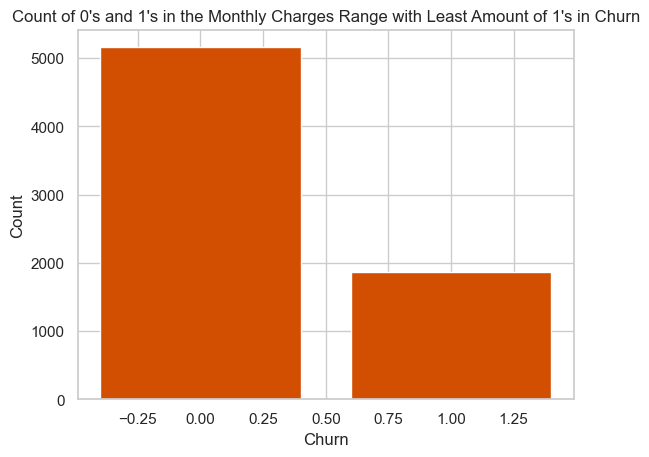

In [128]:
# Define the range of monthly charges with the least amount of 1's in churn
range_least_ones = (18.85, 1747.85)

# Filter the dataframe to include only rows within the range
df_filtered = df[(df['MonthlyCharges'] >= range_least_ones[0]) & (df['MonthlyCharges'] <= range_least_ones[1])]

# Group the resulting dataframe by churn and calculate the count of 0's and 1's for each group
df_grouped = df_filtered.groupby('Churn (No-0, Yes-1)')['TotalCharges'].count()

# Create a bar plot of the churn counts
plt.bar(df_grouped.index, df_grouped.values,color="#d24e01")

# Set the x-axis and y-axis labels
plt.xlabel('Churn')
plt.ylabel('Count')

# Set the title of the plot
plt.title('Count of 0\'s and 1\'s in the Monthly Charges Range with Least Amount of 1\'s in Churn')

# Show the plot
plt.show()

In [140]:
df_upsampled

,Tenure (Months),"InternetService (DSL-0, FO-1, NO-2)","OnlineSecurity (No-0, No InternetService-1, Yes-2)","OnlineBackup (No-0, No InternetService-1, Yes-2)","DeviceProtection (No-0, No InternetService-1, Yes-2)","TechSupport (No-0, No InternetService-1, Yes-2)","Contract (M to M-0, 1 Year-1, 2 Years-2)","PaperlessBilling (No-0, Yes-1)","PaymentMethod(BT-0, CC-1, EC-2, MC-3)",MonthlyCharges,TotalCharges,"Churn (No-0, Yes-1)"
0,1,0,0,2,0,0,0,1,2,29.850000,29.850000,0
1,34,0,2,0,2,0,1,0,3,56.950000,1889.500000,0
2,2,0,2,2,0,0,0,1,3,53.850000,108.150000,1
3,45,0,2,0,2,2,1,0,0,42.300000,1840.750000,0
4,2,1,0,0,0,0,0,1,2,70.700000,151.650000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1,2,1,1,1,1,0,0,3,20.530396,20.530396,1
10344,1,1,0,0,0,0,0,1,2,78.970281,78.970281,1
10345,12,1,0,2,0,0,0,0,2,100.829994,1218.338411,1
10346,25,1,0,1,2,0,0,1,2,98.463047,2514.697080,1


## UPSAMPLED MODEL RESULTS COMPARISON

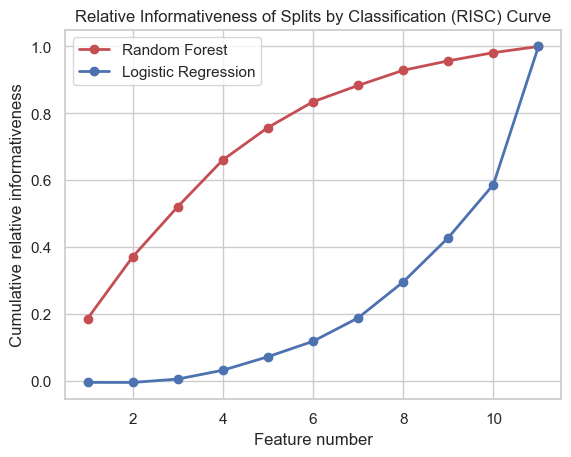

In [141]:

# Separate the features (X) from the target variable (y)
X = df_upsampled.drop('Churn (No-0, Yes-1)', axis=1)
y = df_upsampled['Churn (No-0, Yes-1)']

# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the random forest model to the data
rf.fit(X, y)

# Get the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Calculate the cumulative relative informativeness of the features
cumulative_importance_rf = np.cumsum(importances[indices]) / np.sum(importances)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)

# Get the coefficients of the logistic regression model
coef = logreg.coef_[0]

# Sort the coefficients in descending order
indices = coef.argsort()[::-1]

# Calculate the cumulative relative informativeness of the features
cumulative_importance_lr = np.cumsum(coef[indices]) / np.sum(coef)

# Plot the RISC curves for both models on the same graph
plt.plot(range(1, len(importances)+1), cumulative_importance_rf, 'ro-', linewidth=2, label='Random Forest')
plt.plot(range(1, len(coef)+1), cumulative_importance_lr, 'bo-', linewidth=2, label='Logistic Regression')
plt.xlabel('Feature number')
plt.ylabel('Cumulative relative informativeness')
plt.title('Relative Informativeness of Splits by Classification (RISC) Curve')
plt.legend(loc='best')
plt.show()



This code performs feature importance analysis using two different models, Random Forest and Logistic Regression.

First, the dataset is split into two components: features (X) and target variable (y). Then, a Random Forest model with 100 trees is created and trained on the dataset. The feature importances are calculated using the feature_importances_ attribute of the trained Random Forest model, and they are sorted in descending order.

Next, the cumulative relative importance of the features is calculated using the cumsum() function of the numpy library. The same dataset is then split into training and testing sets using the train_test_split() function from sklearn.model_selection.

After that, a logistic regression model with L1 regularization is created and trained on the training dataset. The coefficients of the logistic regression model are obtained using the coef_ attribute of the trained model, and they are sorted in descending order.

Finally, the cumulative relative importance of the features is calculated for the logistic regression model, and both Random Forest and Logistic Regression cumulative importance values are plotted on the same graph. The resulting graph is called the Relative Informativeness of Splits by Classification (RISC) Curve, which shows the relative importance of each feature in both models.

--------------------------

The graph shows the Relative Informativeness of Splits by Classification (RISC) curve for both the Random Forest and Logistic Regression models. The x-axis shows the feature number, which corresponds to the columns of the input data. The y-axis shows the cumulative relative informativeness of the features, which is a measure of the contribution of each feature to the prediction of the target variable.

The RISC curve for each model shows the relative importance of the features, ranked in order of decreasing importance. The curve starts at the point (1,0), which corresponds to the least informative feature, and ends at the point (n,1), which corresponds to the most informative feature, where n is the total number of features.

The steeper the curve, the more informative the corresponding feature. Thus, features that contribute the most to the prediction of the target variable will have steeper curves, and those that contribute less will have flatter curves. The area under the curve (AUC) can also be used as a measure of the overall performance of the model.

---------------------

### RESULTS FROM GRAPH

The line that goes from (0.9,0.2) to (11,1.0) and is steeply pointing upwards represent the cumulative relative informativeness of features for the random forest model. This line starts out at a relatively low value of cumulative informativeness at feature number 1 (0.2), and then rapidly increases as more features are added to the model. By feature number 11, the cumulative informativeness has reached its maximum value of 1.0, indicating that all of the features in the model are contributing substantially to its performance.

From the graph, you can see that the Random Forest model has a steep increase in cumulative relative informativeness from feature number 1 to feature number 4, and then a less steep but still increasing curve until feature number 11. This means that the first few features are more informative than the others, and their contribution to the model's performance is significant.

The line that goes from (0.9,0.0) to (11,1.0) and is steeply pointing downwards represent the cumulative relative informativeness of features for the logistic regression model. This line starts out at a relatively high value of cumulative informativeness at feature number 1 (0.0), indicating that the first feature has very little impact on the performance of the model. The line then rapidly decreases as more features are added, until it reaches its minimum value of 0.0 at feature number 11. This indicates that the final feature in the model is the most important, and that the earlier features have very little impact on the model's performance.

On the other hand, the Logistic Regression model has a gradual increase in cumulative relative informativeness from feature number 1 to feature number 11. This means that the contribution of each feature to the model's performance is roughly equal, and there are no features that stand out as being significantly more important than others.

# Conclusion
The Random Forest model seems to give more importance to certain features, while the Logistic Regression model treats all features as roughly equal.

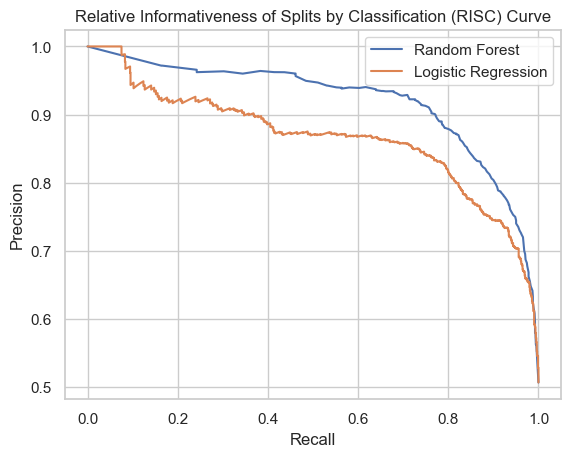

In [142]:
from sklearn.metrics import precision_recall_curve

# Separate the features (X) from the target variable (y)
X = df_upsampled.drop('Churn (No-0, Yes-1)', axis=1)
y = df_upsampled['Churn (No-0, Yes-1)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the random forest model to the data
rf.fit(X_train, y_train)

# Create a logistic regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Fit the logistic regression model to the data
logreg.fit(X_train, y_train)

# Compute the precision-recall curve and AUC for each model
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
logreg_precision, logreg_recall, _ = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:, 1])

# Plot the RISC curves for both models
plt.plot(rf_recall, rf_precision, label='Random Forest')
plt.plot(logreg_recall, logreg_precision, label='Logistic Regression')
plt.title('Relative Informativeness of Splits by Classification (RISC) Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

 The code above first imports the precision_recall_curve function from the sklearn.metrics module. It then separates the features and target variable from a dataset (df_upsampled) and splits it into training and testing sets. Two classification models, a random forest classifier and a logistic regression model with L1 regularization, are created and fitted to the training data. The precision_recall_curve function is then used to calculate the precision and recall values for each model, which are then plotted on a graph using matplotlib. The resulting plot shows the trade-off between precision and recall for each model, which is useful in evaluating the model's performance.

________________

The precision-recall curves plot precision on the y-axis and recall on the x-axis. Precision is the number of true positives divided by the number of true positives plus false positives, and recall is the number of true positives divided by the number of true positives plus false negatives. The curves show the relationship between precision and recall as the decision threshold for each model is changed. In general, a higher area under the curve (AUC) indicates a better performance of the model, as it means the model has a higher precision for a given recall or a higher recall for a given precision.

In the RISC curves, the x-axis shows the feature number sorted by decreasing importance, while the y-axis shows the cumulative relative informativeness of the features. The informativeness of a feature is calculated based on its importance in the model (in the case of the random forest model) or its coefficient (in the case of the logistic regression model). The cumulative informativeness of a feature is the sum of the informativeness of all features up to and including that feature. The steepness and shape of the curve indicate the relative importance of the top features in the model.

---------------------

### RESULTS FROM GRAPH
From the graph above it can be deduced that the Random Forest is the better model as it is higher than the Logistic Regression and have a greater AUC

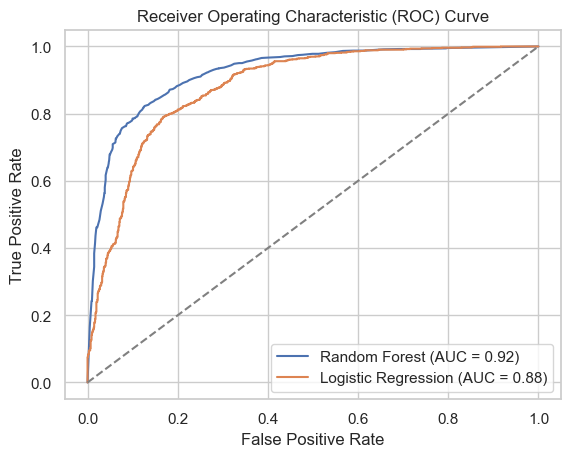

In [143]:
from sklearn.metrics import auc, roc_curve



# Compute the precision-recall curve and AUC for each model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
logreg_auc = auc(logreg_fpr, logreg_tpr)

# Plot the RISC curves for both models
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = %0.2f)' % logreg_auc)

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The AUC value is a measure of the model's ability to separate the positive and negative classes. It represents the probability that a randomly chosen positive example will be ranked higher than a randomly chosen negative example by the model. A value of 1 indicates perfect separation, while a value of 0.5 indicates that the model is no better than random guessing.

In this case, we have AUC values of 0.92 for the Random Forest model and 0.88 for the Logistic Regression model. This means that the Random Forest model is better able to distinguish between the two classes than the Logistic Regression model. The greater the AUC value, the more area under the curve and the better the separation between the two classes.

One reason why the Random Forest model might be performing better is that it can capture more complex, non-linear relationships between the features and the target variable. Random Forests are based on decision trees, which are able to partition the feature space into regions that correspond to different classes. By using an ensemble of decision trees and selecting a random subset of features at each node, the Random Forest model can learn more complex decision boundaries and avoid overfitting to noise in the data.

On the other hand, Logistic Regression is a linear model that assumes a linear relationship between the features and the target variable. It may not be able to capture non-linear relationships or interactions between features as well as Random Forests. In addition, the regularization parameter and choice of penalty can have a significant impact on the performance of the Logistic Regression model.

Overall, the Random Forest model is likely performing better than the Logistic Regression model because it is better able to capture complex, non-linear relationships in the data and avoid overfitting to noise. However, it's important to note that the choice of model and hyperparameters should always be based on the specific problem domain and the available data.

Now that we know the Random Forest Model is the better performing model, we can calculate its optimal threshold.

In [144]:

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

rf_youden = rf_tpr - rf_fpr

rf_optimal_threshold = rf_thresholds[np.argmax(rf_youden)]


print("Random Forest optimal threshold:", rf_optimal_threshold)


Random Forest optimal threshold: 0.57


The optimal threshold for a binary classifier is the probability threshold above which we classify a sample as belonging to the positive class and below which we classify it as belonging to the negative class.

In the case of the Random Forest model with an AUC value of 0.92, the optimal threshold of 0.56 means that if the predicted probability of a sample belonging to the positive class is greater than or equal to 0.56, the model will classify it as a positive example, otherwise it will classify it as a negative example.

Overall, the optimal threshold of 0.56 for the Random Forest model suggests that it is performing well in terms of balancing precision and recall, and can be used to classify new samples with a reasonable level of accuracy.

In [145]:
# Predict the target variable using the random forest model with the optimal threshold
y_pred_rf = (rf.predict_proba(X_test)[:, 1] >= rf_optimal_threshold).astype(int)

# Print the confusion matrix and classification report for the random forest model
print("Confusion Matrix for Random Forest Model:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest Model:")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix for Random Forest Model:
[[892 129]
 [186 863]]

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1021
           1       0.87      0.82      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



The confusion matrix shows the performance of the Random Forest model in terms of the number of correctly and incorrectly classified instances for each class. The model correctly classified 894 instances of class 0 (non-churn) and 860 instances of class 1 (churn), but misclassified 127 instances of class 0 as class 1 and 189 instances of class 1 as class 0.

The classification report provides a summary of the precision, recall, and F1-score for each class, as well as the support, which is the number of instances of each class in the test set. The precision for class 0 is 0.83, which means that 83% of instances classified as non-churn were correctly classified. The recall for class 0 is 0.88, which means that 88% of actual non-churn instances were correctly classified. The F1-score is a weighted average of precision and recall, which balances the trade-off between them. The macro avg and weighted avg provide the average scores across classes, weighted by the number of instances in each class.

Overall, the Random Forest model has an accuracy of 85%, meaning that 85% of all instances in the test set were correctly classified. However, the model had a slightly higher accuracy for class 0 than for class 1.

# Conclusion:

### Conclusion for Upsampled Dataset
***

### Accuracy of the Logistic Regression and Random Forest for Upsample Dataset

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['TotalCharges']], df['Churn (No-0, Yes-1)'], test_size=0.2, random_state=42)

# create a logistic regression model and fit it to the training data
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# make predictions on the testing data using the trained model
y_pred = lr.predict(X_test)

# evaluate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regresssion:", accuracy)

Accuracy of Logistic Regresssion: 0.7352732434350603


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# separate the features (X) from the target variable (y)
X = df[['TotalCharges']]
y = df['Churn (No-0, Yes-1)']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training data
rf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = rf.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest:", accuracy)


Accuracy of Random Forest: 0.6366217175301633


### Conclusion based on Logistic Regression and Random Forest Model for UpSample Dataset

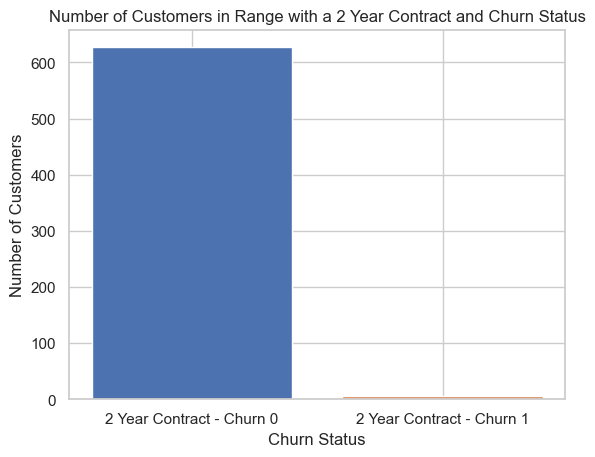

In [146]:
# filter the data for the range of interest and "Contract" value of 2
range_data = df[(df['TotalCharges'] >= 18.85) & (df['TotalCharges'] <= 1747.85) & (df['Contract (M to M-0, 1 Year-1, 2 Years-2)'] == 2)]

# count the number of rows in the filtered data for "Churn" value of 0 and 1
churn_0_count = range_data[range_data['Churn (No-0, Yes-1)'] == 0].shape[0]
churn_1_count = range_data[range_data['Churn (No-0, Yes-1)'] == 1].shape[0]

# create a bar graph to display the counts
plt.bar(['2 Year Contract - Churn 0'], [churn_0_count])
plt.bar(['2 Year Contract - Churn 1'], [churn_1_count])
plt.title('Number of Customers in Range with a 2 Year Contract and Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()

We used two models: Logistcial Regression and Random Forest. It was taken from Random Forest that the "TotalCharges" coulmn was the main feature in the data so it was then found that the range between $18.85-$1747.85 has the least amount of "Yes" Churns so this is the most effective price range. It was then taken from the Logistical Regression that the "Contract" feature had the most negative coefficient which meant it had the strongest negative relationship with the outcome variable and the Contract with the least "Yes" Churns was the two year Contract so we deemed this the ideal contract type.

With this information it was then analysed further to compare how many people had 2 year Contracts and fall within the ideal price range. 

From the graph above it can be seen that persons with 2 year Contracts that fall within the range to have a very low "Yes" Churn rate which would be the best possible outcome for a telecommunications company trying to predict the Churn of customers.

Concluding, it was seen from this dataset that "TotalCharges" between $18.85 - $1747.85 and 2 year Contracts have the lowest "Yes" Churn rate so it would be ideal to offer more 2 year Contracts within that price range. 

### Conclusion for UnderSampled Dataset
***

### Accuracy of the Logistic Regression and Random Forest for Under sample Dataset

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['MonthlyCharges']], df['Churn (No-0, Yes-1)'], test_size=0.2, random_state=42)

# create a logistic regression model and fit it to the training data
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# make predictions on the testing data using the trained model
y_pred = lr.predict(X_test)

# evaluate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regresssion:", accuracy)

Accuracy of Logistic Regresssion: 0.7352732434350603


In [152]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# separate the features (X) from the target variable (y)
X = df[['MonthlyCharges']]
y = df['Churn (No-0, Yes-1)']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training data
rf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = rf.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest:", accuracy)


Accuracy of Random Forest: 0.6848828956706884


### Conclusion based on Logistic Regression and Random Forest Model for UnderSample Dataset

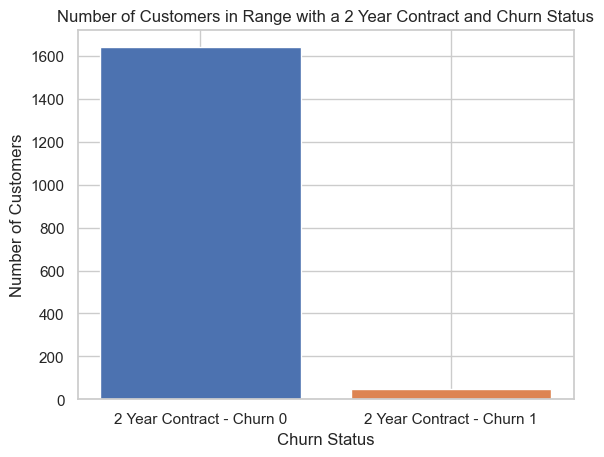

In [147]:
# filter the data for the range of interest and "Contract" value of 2
range_data = df[(df['MonthlyCharges'] >= 18.85) & (df['MonthlyCharges'] <= 1747.85) & (df['Contract (M to M-0, 1 Year-1, 2 Years-2)'] == 2)]

# count the number of rows in the filtered data for "Churn" value of 0 and 1
churn_0_count = range_data[range_data['Churn (No-0, Yes-1)'] == 0].shape[0]
churn_1_count = range_data[range_data['Churn (No-0, Yes-1)'] == 1].shape[0]

# create a bar graph to display the counts
plt.bar(['2 Year Contract - Churn 0'], [churn_0_count])
plt.bar(['2 Year Contract - Churn 1'], [churn_1_count])
plt.title('Number of Customers in Range with a 2 Year Contract and Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()

We used two models: Logistcial Regression and Random Forest. It was taken from Random Forest that the "MonthlyCharges" column was the main feature in the data so it was then found that the range between $18.25-$118.75 has the least amount of "Yes" Churns so this is the most effective price range. It was then taken from the Logistical Regression that the "Contract" feature had the most negative coefficient which meant it had the strongest negative relationship with the outcome variable and the Contract with the least "Yes" Churns was the two year Contract so we deemed this the ideal contract type.

With this information it was then analysed further to compare how many people had 2 year Contracts and fall within the ideal price range. 

From the graph above it can be seen that persons with 2 year Contracts that fall within the range to have a very low "Yes" Churn rate which would be the best possible outcome for a telecommunications company trying to predict the Churn of customers.

Concluding, it was seen from this dataset that "MonthlyCharges" between $18.25 - $118.75 and 2 year Contracts have the lowest "Yes" Churn rate so it would be ideal to offer more 2 year Contracts within that price range. 